In [1]:
import csv
import math
import decimal
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#ajschwabe@wisc.edu

In [3]:
def esat(t):
    T = t - 273
    e = 611.2 * math.exp((17.67 * T) / (T + 243.5))
    return e

def other_esat(t):
    T = t - 273
    e = 2.53e11 * np.log(-5420 / T)
    return e

def wsat(t, p):
    e = other_esat(t)
    w = (0.622 * e) / p
    return w

def qsat(t, p):
    w = wsat(t, p)
    q = w / (1 + w)
    return q

Z = [0.]
def compute_Z(t, p):
    for t1, t2, p1, p2 in zip(t[:-1], t[1:], p[:-1], p[1:]):
        #Pa1 = P1 * hPa
        #Pa2 = P2 * hPa
        t1 =- 273.15
        t2 =- 273.15
        q1 = qsat(t1, p1)
        q2 = qsat(t2, p2)
        Tv1 = t1 * (1 + (0.61 * q1))
        Tv2 = t2 * (1 + (0.61 * q2))
        Tvbar = (Tv1 + Tv2) / 2

        delz = ((287 * Tvbar) / 9.8) * math.log(p1/p2)
        Z.append(delz + Z[-1])

In [4]:
p = []
t = []
es = []
ws = []
qs = []

with open('sounding.txt', 'r') as f:
    for line in f.readlines():
        split_lines = line.split()
        p.append(float(split_lines[0]))
        t.append(float(split_lines[2]))
        es.append(other_esat(float(split_lines[2])))
        ws.append(wsat(float(split_lines[2]), float(split_lines[0])))
        qs.append(qsat(float(split_lines[2]), float(split_lines[0])))
        print split_lines

['989.0', '287', '-7.5', '-9.3', '87', '1.92', '275', '3', '266.5', '271.8', '266.8']
['975.0', '398', '-8.7', '-10.9', '84', '1.72', '282', '6', '266.4', '271.1', '266.6']
['948.6', '610', '-10.7', '-11.7', '92', '1.65', '295', '13', '266.5', '271.1', '266.7']
['943.0', '656', '-11.1', '-11.9', '94', '1.64', '295', '13', '266.5', '271.1', '266.8']
['934.0', '729', '-10.9', '-14.2', '77', '1.37', '295', '13', '267.4', '271.3', '267.6']
['926.0', '796', '-10.7', '-14.3', '75', '1.37', '295', '13', '268.3', '272.2', '268.5']
['925.0', '804', '-10.7', '-14.3', '75', '1.37', '295', '13', '268.4', '272.3', '268.6']
['911.8', '914', '-11.5', '-15.1', '75', '1.31', '295', '15', '268.7', '272.4', '268.9']
['882.0', '1168', '-13.3', '-16.8', '75', '1.17', '295', '15', '269.3', '272.7', '269.5']
['876.1', '1219', '-13.5', '-18.5', '66', '1.02', '295', '15', '269.6', '272.6', '269.8']
['872.0', '1255', '-13.7', '-19.7', '61', '0.93', '294', '15', '269.8', '272.5', '270.0']
['857.0', '1386', '-14.

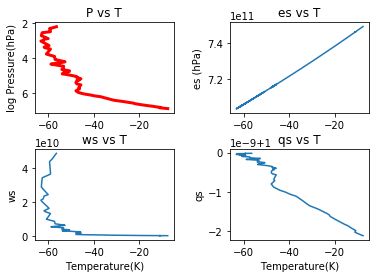

In [5]:
x = t
y = p
fig = plt.figure()
plt.subplot(221)
plt.plot(x, np.log(y), 'r', linewidth = 3)
#plt.semilogy()
plt.rc('ytick', labelsize = 10)
plt.rc('xtick', labelsize = 10)
#yticks = np.linspace(min(np.log(p)), max(np.log(p)), 10).tolist()
#xticks = np.linspace(min(t), max(t), 10).tolist()
#plt.yticks(yticks)
#plt.xticks(xticks)
plt.ylim(max(np.log(y)) + 0.25, min(np.log(y)) - 0.25)
plt.title('P vs T')
plt.ylabel('log Pressure(hPa)')

plt.subplot(222)
plt.plot(t, es)
plt.title('es vs T')
plt.ylabel('es (hPa)')
plt.subplot(223)
plt.plot(t, ws)
plt.title('ws vs T')
plt.ylabel('ws')
plt.xlabel('Temperature(K)')
plt.subplot(224)
plt.plot(t, qs)
plt.title('qs vs T')
plt.ylabel('qs')
plt.xlabel('Temperature(K)')

fig.subplots_adjust(wspace = 0.4, hspace=.4)

#fig.savefig('4 vs T.pdf')

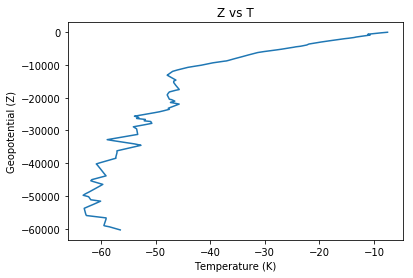

In [6]:
compute_Z(t, p)
x = t
y = Z
fig = plt.figure()
plt.plot(x, y)
plt.title('Z vs T')
plt.ylabel('Geopotential (Z)')
plt.xlabel('Temperature (K)')

#fig.savefig('Z vs T.pdf')

In [7]:
for t1, t2, p1, p2 in zip(t[:-1], t[1:], p[:-1], p[1:]):
    print t1

-7.5
-8.7
-10.7
-11.1
-10.9
-10.7
-10.7
-11.5
-13.3
-13.5
-13.7
-14.7
-15.3
-18.1
-19.7
-20.2
-21.9
-22.0
-22.3
-23.2
-23.5
-24.3
-24.7
-25.3
-26.9
-27.9
-29.8
-30.1
-31.3
-33.0
-34.1
-35.5
-36.7
-37.1
-37.3
-39.5
-41.7
-42.7
-44.1
-46.0
-46.3
-46.9
-47.9
-47.7
-46.3
-46.7
-46.7
-46.3
-45.7
-45.7
-46.3
-47.5
-47.7
-47.9
-47.5
-47.1
-46.5
-47.3
-46.8
-45.7
-47.7
-47.5
-48.5
-49.3
-50.2
-53.9
-53.6
-53.1
-53.5
-51.9
-52.1
-52.1
-50.9
-50.8
-50.7
-51.9
-54.1
-53.5
-53.3
-53.5
-57.8
-58.9
-57.8
-55.4
-53.9
-53.2
-52.7
-57.1
-57.1
-57.2
-57.3
-57.3
-57.3
-57.7
-60.3
-60.9
-60.7
-60.1
-59.5
-59.1
-60.1
-61.6
-61.7
-61.9
-61.5
-59.7
-60.1
-62.2
-62.9
-63.3
-62.3
-61.9
-60.1
-61.4
-62.3
-63.1
-63.1
-62.9
-62.8
-62.7
-59.1
-59.1
-59.5
-59.3
-58.5
-57.1
